# Visualize the manually constructed dataset of mining areas and ground truth masks

In [19]:
import geopandas as gpd
import leafmap
from shapely.ops import unary_union
from shapely.geometry import Point, mapping, box, shape
import shapely
import json
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

os.getcwd()
root = os.path.dirname(os.getcwd())

In [5]:
raw_dataset = root + "/data/raw/mining_tiles_with_masks.gpkg"

post_dataset = root + "/data/processed/mining_tiles_with_masks_and_bounding_boxes.gpkg"

In [3]:
# Load the data
data = gpd.read_file(raw_dataset, layer="tiles")

data.head()

,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2176,S2B_MSIL2A_20190909T033539_R061_T49VFE_2020100...,both,tang,Surface,Industrial,,2024-06-28 09:11:07.482,"POLYGON ((114.26466 58.16196, 114.25047 58.345..."
1,1866,S2B_MSIL2A_20190121T041059_R047_T46RGN_2020100...,maus,maus,Surface,Industrial,,2024-06-28 09:11:40.081,"POLYGON ((95.68252 24.65585, 95.68649 24.8406,..."
2,653,S2A_MSIL2A_20160305T143722_R096_T20NPL_2021052...,maus,maus,Surface,Industrial,,2024-06-28 09:13:06.719,"POLYGON ((-61.32459 4.65719, -61.32414 4.84238..."
3,2749,S2B_MSIL2A_20200525T022549_R046_T53ULU_2020091...,tang,tang,Surface,Artisanal,,2024-06-28 09:14:55.294,"POLYGON ((132.90662 52.82744, 132.89773 53.011..."
4,152,S2B_MSIL2A_20190919T184039_R070_T12VVJ_2020100...,both,tang,Surface,Industrial,,2024-06-28 09:16:00.696,"POLYGON ((-111.08086 56.99153, -111.08126 57.1..."


In [4]:
# Create a Leaflet map
m = leafmap.Map()

# Add the GeoDataFrame to the map
m.add_gdf(data, layer_name="dataset")

# Display the map
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Visualize the global distribution of the tiles

In [8]:
# Using Markers on leafmap
def plot_tiles_on_basemap(gdf):
    import folium

    m = folium.Map()

    # Iterate over the tiles and add markers to the map
    for _, row in gdf.iterrows():
        lat = row.geometry.centroid.y
        lon = row.geometry.centroid.x
        folium.Marker([lat, lon]).add_to(m)

    # Display the map
    return m

plot_tiles_on_basemap(data)

# Load processed dataset

In [44]:
# list layernames 
gpd.list_layers(post_dataset)

,name,geometry_type
0,tiles,Polygon
1,maus_polygons,Polygon
2,tang_polygons,Polygon
3,maus_bboxes,Polygon
4,tang_bboxes,Polygon
5,preferred_polygons,Polygon
6,preferred_bboxes,Polygon


In [6]:
# load the processed dataset
tiles = gpd.read_file(post_dataset, layer="tiles")
maus_poly = gpd.read_file(post_dataset, layer="maus_polygons")
tang_poly = gpd.read_file(post_dataset, layer="tang_polygons")
preferred_poly = gpd.read_file(post_dataset, layer="preferred_polygons")
maus_bbox = gpd.read_file(post_dataset, layer="maus_bboxes")
tang_bbox = gpd.read_file(post_dataset, layer="tang_bboxes")
preferred_bbox = gpd.read_file(post_dataset, layer="preferred_bboxes")
tiles.head()

,tile_id,s2_tile_id,source_dataset,preferred_dataset,minetype1,minetype2,comment,timestamp,geometry
0,2176,S2B_MSIL2A_20190909T033539_R061_T49VFE_2020100...,both,tang,Surface,Industrial,,2024-06-28 09:11:07.482,"POLYGON ((114.26466 58.16196, 114.25047 58.345..."
1,1866,S2B_MSIL2A_20190121T041059_R047_T46RGN_2020100...,maus,maus,Surface,Industrial,,2024-06-28 09:11:40.081,"POLYGON ((95.68252 24.65585, 95.68649 24.8406,..."
2,653,S2A_MSIL2A_20160305T143722_R096_T20NPL_2021052...,maus,maus,Surface,Industrial,,2024-06-28 09:13:06.719,"POLYGON ((-61.32459 4.65719, -61.32414 4.84238..."
3,2749,S2B_MSIL2A_20200525T022549_R046_T53ULU_2020091...,tang,tang,Surface,Artisanal,,2024-06-28 09:14:55.294,"POLYGON ((132.90662 52.82744, 132.89773 53.011..."
4,152,S2B_MSIL2A_20190919T184039_R070_T12VVJ_2020100...,both,tang,Surface,Industrial,,2024-06-28 09:16:00.696,"POLYGON ((-111.08086 56.99153, -111.08126 57.1..."


Construct one coherent dataset with the preferred mask

## Visualize the processed dataset

In [8]:
ROW = 5

m = leafmap.Map(center = (tiles.iloc[ROW:ROW+1].geometry.centroid.y.values[0], tiles.iloc[ROW:ROW+1].geometry.centroid.x.values[0]), zoom = 12)
# add satellite
m.add_basemap("SATELLITE")

style_tile = {
    "color": "orange",
    "fillColor": "orange",
    "fillOpacity": 0.0,
}

style_bbox = {
    "color": "green",
    "fillColor": "green",
    "fillOpacity": 0.0,
}

m.add_gdf(tiles.iloc[ROW:ROW+1], layer_name="tiles", style=style_tile)
m.add_gdf(preferred_poly.iloc[ROW:ROW+1], layer_name="masks")
m.add_gdf(preferred_bbox.iloc[ROW:ROW+1], layer_name="bboxes", style=style_bbox)
m

Map(center=[47.41662619753377, -92.58333336689567], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# Check the image masks and chips

In [20]:
chips_dir = "/data/processed/chips/train/chips"
# list files
files = os.listdir(root + chips_dir)

img = np.load(root + chips_dir + "/" + files[0])
img.shape

(3, 512, 512)

In [32]:
img

array([[[1.118e+03, 8.900e+02, 7.490e+02, ..., 8.940e+02, 9.150e+02,
         1.011e+03],
        [1.328e+03, 9.870e+02, 7.890e+02, ..., 9.730e+02, 1.048e+03,
         9.960e+02],
        [1.360e+03, 1.122e+03, 8.410e+02, ..., 1.005e+03, 1.082e+03,
         9.070e+02],
        ...,
        [3.000e+00, 1.000e+00, 3.000e+01, ..., 7.160e+02, 7.330e+02,
         7.690e+02],
        [1.000e+00, 2.400e+01, 3.700e+01, ..., 7.490e+02, 7.220e+02,
         7.530e+02],
        [1.000e+00, 1.500e+01, 1.400e+01, ..., 8.050e+02, 7.670e+02,
         7.240e+02]],

       [[6.210e+02, 4.390e+02, 3.670e+02, ..., 6.690e+02, 6.920e+02,
         6.500e+02],
        [8.600e+02, 5.270e+02, 3.700e+02, ..., 7.080e+02, 7.060e+02,
         6.120e+02],
        [8.620e+02, 7.890e+02, 4.640e+02, ..., 7.100e+02, 7.030e+02,
         5.320e+02],
        ...,
        [1.140e+02, 1.090e+02, 9.400e+01, ..., 5.360e+02, 5.160e+02,
         4.680e+02],
        [8.100e+01, 8.900e+01, 1.120e+02, ..., 5.420e+02, 5.220e+02,
   

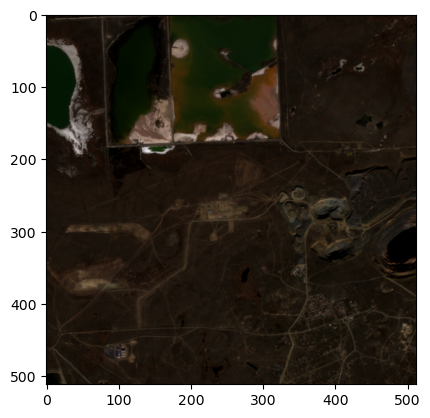

In [28]:
im2display = img.transpose((1,2,0))

# normalize and clip the image ranges
im2display = (im2display - im2display.min()) / (im2display.max() - im2display.min())
im2display = np.clip(im2display, 0, 1)

plt.imshow(im2display)

In [29]:
labels_dir = "/data/processed/chips/train/labels"
# list files
files = os.listdir(root + labels_dir)

mask = np.load(root + labels_dir + "/" + files[0])
mask.shape

(1, 512, 512)

In [34]:
mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]], dtype=uint8)

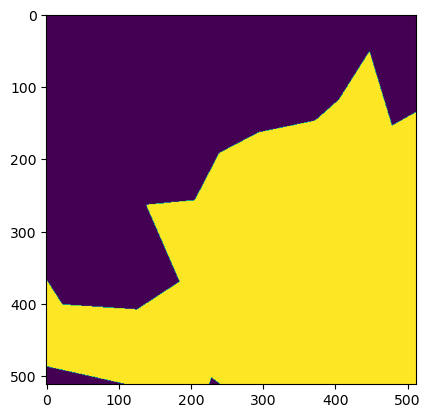

In [30]:
im2display = mask.transpose((1,2,0))

plt.imshow(im2display)